C:\Users\Elena\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Elena\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Elena\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

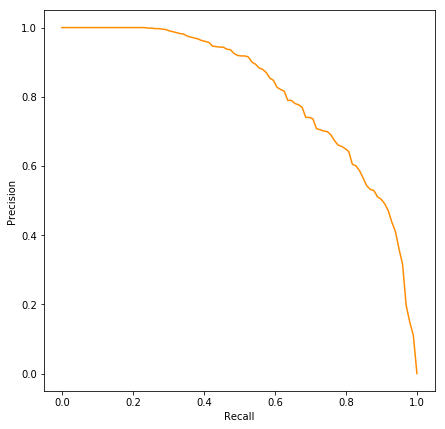

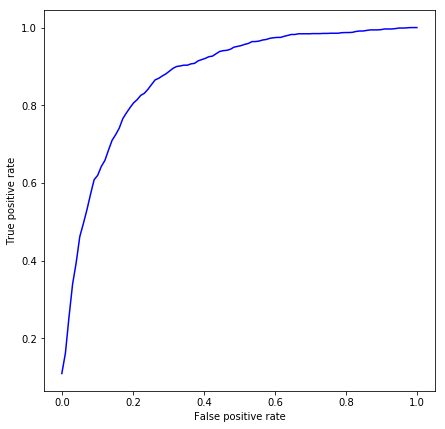

roc_auc_score is 0.874187049877
precision_score is 0.813850677757


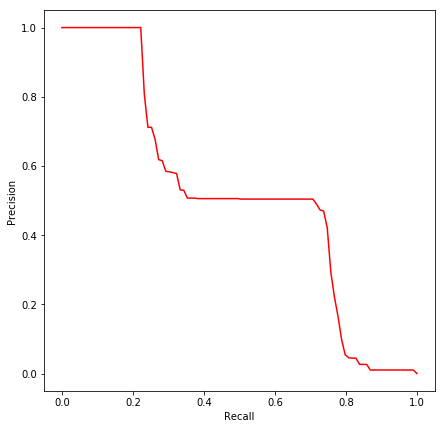

Precision for 50% threshold is 0.505771584035


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import interp


fpr = []
tpr = []
pres = []
roc_auc = []
precision_score = []
pres_rand = []
precision_rand_fifty = []


# open dfs
bact_f = pd.read_table('proteobacteria-f_fitch_g-b.txt')
bact_g = pd.read_table('proteobacteria-g_fitch_g-b.txt')
fun = pd.read_table('fungi_fitch_g-b.txt')
euk = pd.read_table('eukaryota_fitch_g-b.txt')
archaea = pd.read_table('archaea_fitch_g-b.txt')

# merging the training set
frames = [archaea, fun, euk, bact_f]
df = pd.concat(frames)


# Create a list of the feature column's names
features = df.columns[1:-1]

# 10-fold cross-validation
mean_fpr = np.linspace(0, 1, 100)
kf = KFold(n_splits=10) 
for train_index, test_index in kf.split(df):
    train, test = df.iloc[train_index], df.iloc[test_index]

    X_train = train[features].as_matrix()
    X_test = test[features].as_matrix()

    y_train = train['division'] == 'good'
    y_test = test['division'] == 'good'

    # Create a random forest Classifier
    clf = RandomForestClassifier(n_estimators = 1000)

    # Train the Classifier to take the training features and learn how they relate to the training y (the species)
    classifier = clf.fit(X_train, y_train)
    predictions = pd.DataFrame(data = classifier.predict_proba(X_test))
    predictions = predictions[1]
    #create "random prediction" vector - let it be "probabilities" of predicted classes
    y_rand = np.random.uniform(low=0.000, high=1.000, size=test.shape[0], )
    
    preds = clf.predict(X_test)
    test['preds'] = preds
    
    #data for roc curve
    fpri, tpri, _ = roc_curve(y_test, predictions)
    roc_auc.append(roc_auc_score(y_test, predictions))
    tpr.append(interp(mean_fpr, fpri, tpri))

    #data for precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, predictions, )
    pres.append(interp(mean_fpr, precision, recall))
    precision_score.append(average_precision_score(y_test, predictions))
    
    #data for random precision-recall curve
    y_rand = np.array(y_rand)
    y_test = np.array(y_test)
    precision_rand, recall_rand, thresholds_rand = precision_recall_curve(y_test, y_rand, )
    pres_rand.append(interp(mean_fpr, precision_rand, recall_rand))
    
    idx = np.abs(thresholds_rand - 0.5).argmin()
    precision_rand_fifty.append(precision_rand[idx])
 
    
pres = np.mean(pres, axis = 0)
tpr = np.mean(tpr, axis = 0)
roc_auc = np.mean(roc_auc, axis = 0)
precision_score = np.mean(precision_score, axis = 0)
pres_rand = np.mean(pres_rand, axis = 0)
precision_rand_fifty = np.mean(precision_rand_fifty, axis = 0)

plt.figure(figsize=(7,7))
plt.plot(mean_fpr,pres, color = 'darkorange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

plt.figure(figsize=(7,7))
plt.plot(mean_fpr, tpr, color='blue')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

print("roc_auc_score is " + str(roc_auc))
print("precision_score is " + str(precision_score))

plt.figure(figsize=(7,7))
plt.plot(mean_fpr,pres_rand, color = 'red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
print("Precision for 50% threshold is " + str(precision_rand_fifty))

In [14]:
#let us see feature importance
features_= features.tolist()
feature_importances = clf.feature_importances_.tolist()
important_features = zip(feature_importances, features_)

sorted(important_features)

[(0.0023037276132381896, 'FPR_min'),
 (0.004833638904244338, 'TPR/FPRsum1'),
 (0.005468793334230492, 'TPR_min'),
 (0.006811621702432209, 'TPR/FPRsum5'),
 (0.007144306536113025, 'TPR/FPRsum3'),
 (0.007248331373803165, 'TPR/FPRsum_min'),
 (0.008179108223840225, 'TPR_3'),
 (0.008318203764550641, 'TPR_6'),
 (0.008377799883185561, 'TPR_1'),
 (0.008414811860911807, 'TPR_5'),
 (0.00850210981776063, 'TPR_8'),
 (0.00854307269448561, 'TPR_4'),
 (0.008575187338204414, 'TPR_2'),
 (0.00858465531998869, 'TPR/FPRsum4'),
 (0.008790272041128745, 'TPR/FPRsum7'),
 (0.008812805278105382, 'TPR/FPRsum2'),
 (0.008922563664318477, 'TPR_7'),
 (0.009146188894340145, 'FPR_1'),
 (0.009148110979030557, 'TPR/FPRsum6'),
 (0.009271860952842749, 'TPR/FPRsum9'),
 (0.00927716246443766, 'TPR_9'),
 (0.009409060152651624, 'TPR/FPRsum8'),
 (0.010583731716615974, 'TPR_max'),
 (0.011059545695713909, 'FPR_max'),
 (0.011240754932607898, 'FPR_2'),
 (0.011394049548667462, 'TPR/FPRsum_max'),
 (0.012617984304247348, 'FPR_3'),
 (0.0